Mounted at /content/drive
Loaded columns: ['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE']


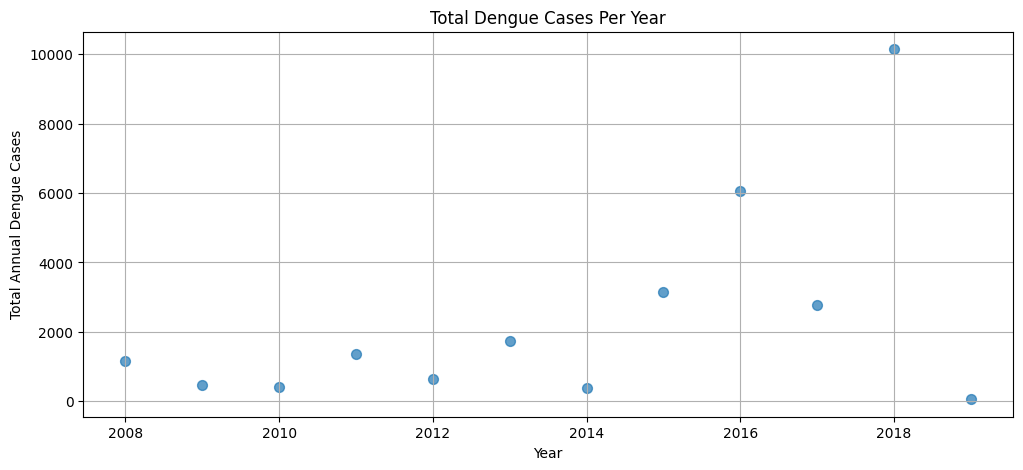

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from google.colab import drive
from sklearn.metrics import mean_absolute_error

drive.mount('/content/drive')
filename = '/content/drive/MyDrive/CSE425_AI_DengueOutbreakPrediction/Dataset/DengueAndClimateBangladesh.csv'
df = pd.read_csv(filename)

print("Loaded columns:", df.columns.tolist())
# df = df.fillna(df.mean(numeric_only=True))

#AGGREGATE BY YEAR - Sum all dengue cases per year
df_yearly = df.groupby('YEAR').agg({
    'DENGUE': 'sum',
    'MIN': 'mean',
    'MAX': 'mean',
    'HUMIDITY': 'mean',
    'RAINFALL': 'sum'
}).reset_index()

#Plot the aggregated data
plt.figure(figsize=(12,5))
plt.scatter(df_yearly['YEAR'], df_yearly['DENGUE'], alpha=0.7, s=50)
plt.title("Total Dengue Cases Per Year")
plt.xlabel("Year")
plt.ylabel("Total Annual Dengue Cases")
plt.grid(True)
plt.show()



Best Theta0 (MIN): 2733.469387755102
Best Theta1 (MIN): 93
Best Test RMSE (MIN): 3915.740460873288
Best Test R2 (MIN): 0.00011856650939723323
Train RMSE (MIN): 3498.0524896528036
Train R2 (MIN): -2.6828244575443936
Train MAE (MIN): 3317.776636665913
Test MAE (MIN): 3642.759989090034
Predicted Dengue Cases (MIN): 3995


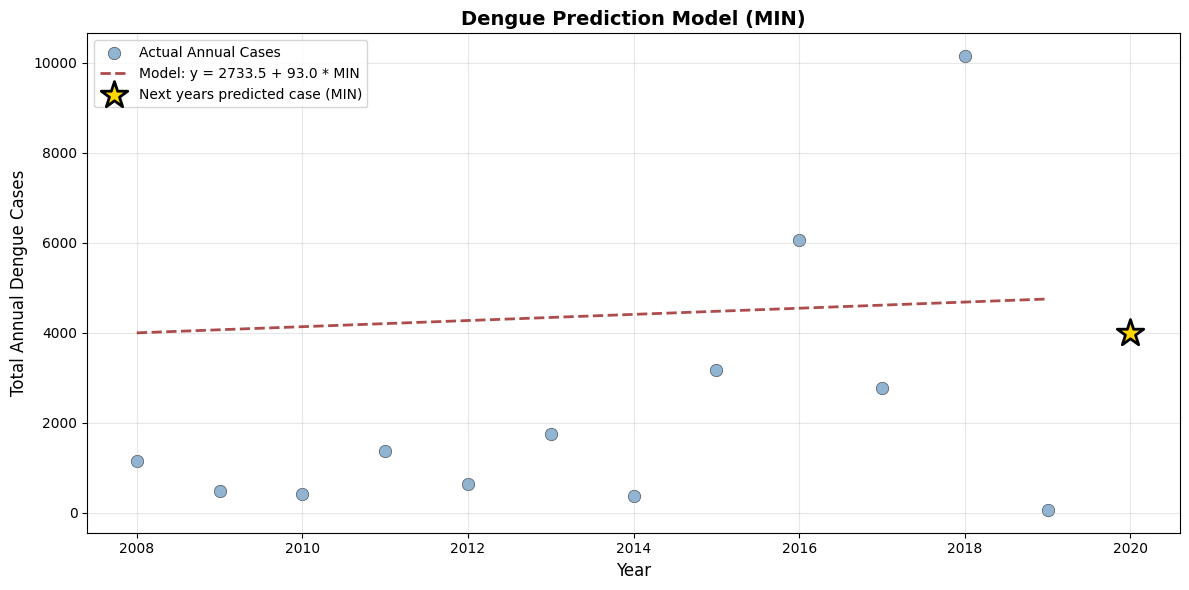

In [2]:
x1 = df_yearly[['MIN']]
y = df_yearly['DENGUE']
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=42)
years_test = df_yearly.loc[y_test.index, 'YEAR'].values
years_train = df_yearly.loc[y_train.index, 'YEAR'].values
X_train_np = X_train.values.flatten()
X_test_np = X_test.values.flatten()

#Ranges for theta0 and theta1
theta0_range = np.linspace(y.min(), y.max(), 50)
theta1_range = np.arange(1, 101)

#RMSE Calculations
best_rmse = float("inf")
best_theta0 = None
best_theta1 = None
best_r2 = None

rmse_list_min = []
mse_list_min = []
iter_list_min = []
iter_count = 0
best_iter = None

for t0 in theta0_range:
    for t1 in theta1_range:
        y_pred = t0 + t1 * X_test_np
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        iter_count += 1
        rmse_list_min.append(rmse)
        mse_list_min.append(rmse**2)
        iter_list_min.append(iter_count)

        if rmse < best_rmse:
            best_rmse = rmse
            best_theta0 = t0
            best_theta1 = t1
            best_r2 = r2_score(y_test, y_pred)
            best_iter = iter_count

#Calculating other metrices
X_train_pred = best_theta0 + best_theta1 * X_train_np
train_rmse = np.sqrt(mean_squared_error(y_train, X_train_pred))
train_r2 = r2_score(y_train, X_train_pred)
y_test_pred = best_theta0 + best_theta1 * X_test_np

#Creating the graph
plt.figure(figsize=(12,6))
plt.scatter(df_yearly['YEAR'], df_yearly['DENGUE'], alpha=0.6, s=80, label="Actual Annual Cases", color='steelblue', edgecolors='black', linewidth=0.5)

#Values for the graph axis
year_min = df_yearly['YEAR'].min()
year_max = df_yearly['YEAR'].max()
min_temp_min = df_yearly['MIN'].min()
min_temp_max = df_yearly['MIN'].max()

line_x = np.array([year_min, year_max])
line_y = best_theta0 + best_theta1 * np.array([min_temp_min, min_temp_max])

test_mae = mean_absolute_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, X_train_pred)

#Predicting next years dengue cases
next_year = year_max + 1
recent_min_temp = df_yearly.loc[df_yearly['YEAR'] == year_max, 'MIN'].values[0]
predicted_dengue_next_year_min = best_theta0 + best_theta1 * recent_min_temp

#Compute MAE across the theta grid and plot
mae_list_min = []
iter_min_list = []
iter_count = 0

for t0 in theta0_range:
    for t1 in theta1_range:
        y_pred = t0 + t1 * X_test_np
        mae = mean_absolute_error(y_test, y_pred)
        iter_count += 1
        mae_list_min.append(mae)
        iter_min_list.append(iter_count)

print("Best Theta0 (MIN):", best_theta0)
print("Best Theta1 (MIN):", best_theta1)
print("Best Test RMSE (MIN):", best_rmse)
print("Best Test R2 (MIN):", best_r2)
print("Train RMSE (MIN):", train_rmse)
print("Train R2 (MIN):", train_r2)
print("Train MAE (MIN):", train_mae)
print("Test MAE (MIN):", test_mae)
print(f"Predicted Dengue Cases for next year (MIN): {predicted_dengue_next_year_min:.0f}")

plt.plot(line_x, line_y, color='darkred', linewidth=2, linestyle='--', label=f"Model: y = {best_theta0:.1f} + {best_theta1:.1f} * MIN", alpha=0.7)
plt.scatter(next_year, predicted_dengue_next_year_min, s=400, marker='*', color='gold', edgecolors='black', linewidth=2, label='Next years predicted case (MIN)', zorder=5)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Annual Dengue Cases", fontsize=12)
plt.title("Dengue Prediction Model (MIN)", fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Best Theta0 (MAX): 4587.102040816327
Best Theta1 (MAX): 3
Best Test RMSE (MAX): 3916.563738263403
Best Test R2 (MAX): -0.00030192423622232845
Train RMSE (MAX): 3588.539828778648
Train R2 (MAX): -2.8758228276629363
Train MAE (MAX): 3398.2338970654764
Test MAE (MAX): 3636.287827772942
Predicted Dengue Cases for next year (MAX): 4669


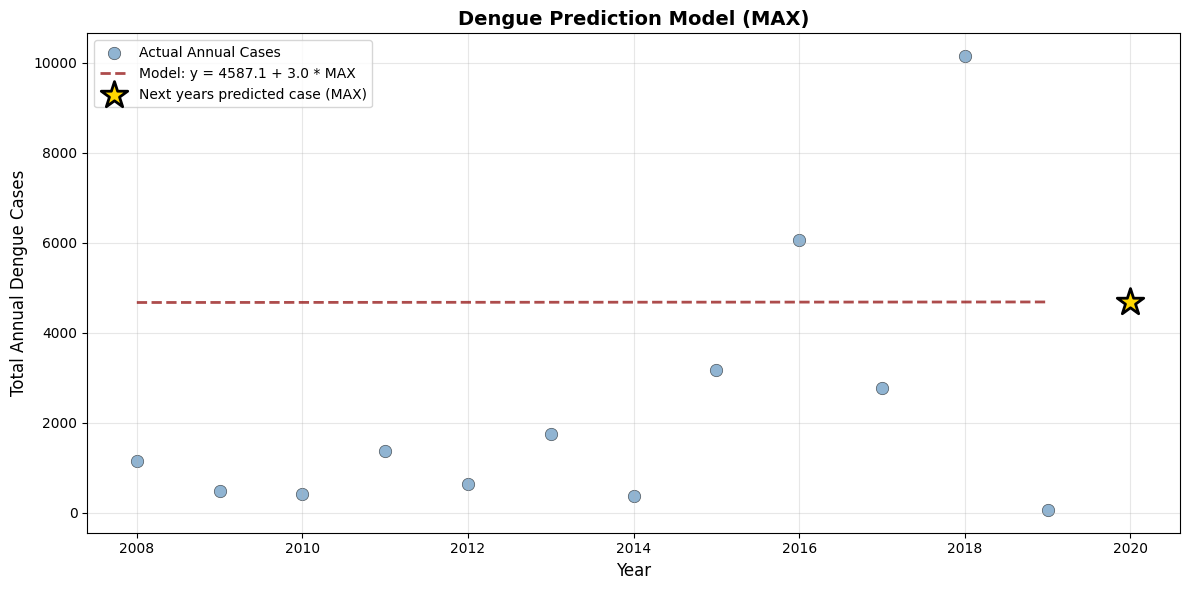

In [3]:
x2 = df_yearly[['MAX']]
y = df_yearly['DENGUE']
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.20, random_state=42)
years_test = df_yearly.loc[y_test.index, 'YEAR'].values
years_train = df_yearly.loc[y_train.index, 'YEAR'].values
X_train_np = X_train.values.flatten()
X_test_np = X_test.values.flatten()

#Ranges for theta0 and theta1
theta0_range = np.linspace(y.min(), y.max(), 50)
theta1_range = np.arange(1, 101)

#RMSE Calculations
best_rmse = float("inf")
best_theta0 = None
best_theta1 = None
best_r2 = None

rmse_list_max = []
mse_list_max = []
iter_list_max = []
iter_count = 0
best_iter = None

for t0 in theta0_range:
    for t1 in theta1_range:
        y_pred = t0 + t1 * X_test_np
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        iter_count += 1
        rmse_list_max.append(rmse)
        mse_list_max.append(rmse**2)
        iter_list_max.append(iter_count)

        if rmse < best_rmse:
            best_rmse = rmse
            best_theta0 = t0
            best_theta1 = t1
            best_r2 = r2_score(y_test, y_pred)
            best_iter = iter_count

#Calculating other metrices
X_train_pred = best_theta0 + best_theta1 * X_train_np
train_rmse = np.sqrt(mean_squared_error(y_train, X_train_pred))
train_r2 = r2_score(y_train, X_train_pred)
y_test_pred = best_theta0 + best_theta1 * X_test_np

#Creating the graph
plt.figure(figsize=(12,6))
plt.scatter(df_yearly['YEAR'], df_yearly['DENGUE'], alpha=0.6, s=80, label="Actual Annual Cases", color='steelblue', edgecolors='black', linewidth=0.5)

#Values for the graph axis
year_min = df_yearly['YEAR'].min()
year_max = df_yearly['YEAR'].max()
max_temp_min = df_yearly['MAX'].min()
max_temp_max = df_yearly['MAX'].max()

line_x = np.array([year_min, year_max])
line_y_max = best_theta0 + best_theta1 * np.array([max_temp_min, max_temp_max])

test_mae = mean_absolute_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, X_train_pred)

#Predicting next years dengue cases
next_year = year_max + 1
recent_max_temp = df_yearly.loc[df_yearly['YEAR'] == year_max, 'MAX'].values[0]
predicted_dengue_next_year_max = best_theta0 + best_theta1 * recent_max_temp

#Compute MAE across the theta grid and plot
mae_list_max = []
iter_max_list = []
iter_count = 0

for t0 in theta0_range:
    for t1 in theta1_range:
        y_pred = t0 + t1 * X_test_np
        mae = mean_absolute_error(y_test, y_pred)
        iter_count += 1
        mae_list_max.append(mae)
        iter_max_list.append(iter_count)

print("Best Theta0 (MAX):", best_theta0)
print("Best Theta1 (MAX):", best_theta1)
print("Best Test RMSE (MAX):", best_rmse)
print("Best Test R2 (MAX):", best_r2)
print("Train RMSE (MAX):", train_rmse)
print("Train R2 (MAX):", train_r2)
print("Train MAE (MAX):", train_mae)
print("Test MAE (MAX):", test_mae)
print(f"Predicted Dengue Cases for next year (MAX): {predicted_dengue_next_year_max:.0f}")

plt.plot(line_x, line_y_max, color='darkred', linewidth=2, linestyle='--', label=f"Model: y = {best_theta0:.1f} + {best_theta1:.1f} * MAX", alpha=0.7)
plt.scatter(next_year, predicted_dengue_next_year_max, s=400, marker='*', color='gold', edgecolors='black', linewidth=2, label='Next years predicted case (MAX)', zorder=5)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Annual Dengue Cases", fontsize=12)
plt.title("Dengue Prediction Model (MAX)", fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Best Theta0 (HUMIDITY): 4587.102040816327
Best Theta1 (HUMIDITY): 1
Best Test RMSE (HUMIDITY): 3916.3590643745865
Best Test R2 (HUMIDITY): -0.00019737833889355016
Train RMSE (HUMIDITY): 3578.42046016853
Train R2 (HUMIDITY): -2.8539946847395874
Train MAE (HUMIDITY): 3389.0561225063093
Test MAE (HUMIDITY): 3632.216238481553
Predicted Dengue Cases for next year (HUMIDITY): 4665


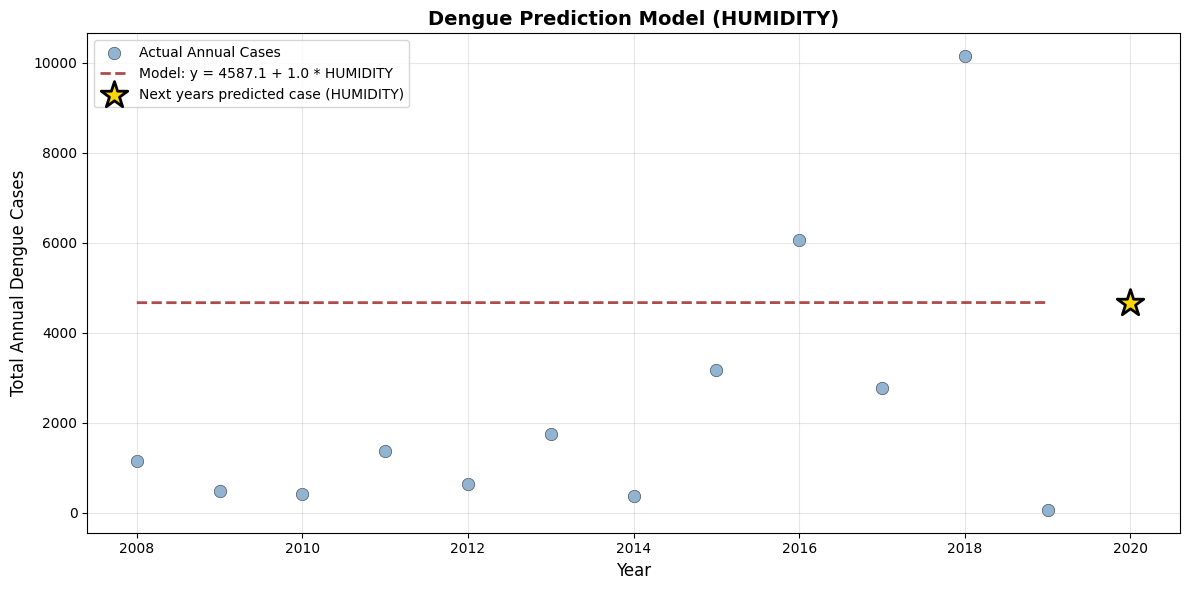

In [4]:
x3 = df_yearly[['HUMIDITY']]
y = df_yearly['DENGUE']
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.20, random_state=42)
years_test = df_yearly.loc[y_test.index, 'YEAR'].values
years_train = df_yearly.loc[y_train.index, 'YEAR'].values
X_train_np = X_train.values.flatten()
X_test_np = X_test.values.flatten()

#Ranges for theta0 and theta1
theta0_range = np.linspace(y.min(), y.max(), 50)
theta1_range = np.arange(1, 101)

#RMSE Calculations
best_rmse = float("inf")
best_theta0 = None
best_theta1 = None
best_r2 = None

rmse_list_hum = []
mse_list_hum = []
iter_list_hum = []
iter_count = 0
best_iter = None

for t0 in theta0_range:
    for t1 in theta1_range:
        y_pred = t0 + t1 * X_test_np
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        iter_count += 1
        rmse_list_hum.append(rmse)
        mse_list_hum.append(rmse**2)
        iter_list_hum.append(iter_count)

        if rmse < best_rmse:
            best_rmse = rmse
            best_theta0 = t0
            best_theta1 = t1
            best_r2 = r2_score(y_test, y_pred)
            best_iter = iter_count

#Calculating other metrices
X_train_pred = best_theta0 + best_theta1 * X_train_np
train_rmse = np.sqrt(mean_squared_error(y_train, X_train_pred))
train_r2 = r2_score(y_train, X_train_pred)
y_test_pred = best_theta0 + best_theta1 * X_test_np

#Creating the graph
plt.figure(figsize=(12,6))
plt.scatter(df_yearly['YEAR'], df_yearly['DENGUE'], alpha=0.6, s=80, label="Actual Annual Cases", color='steelblue', edgecolors='black', linewidth=0.5)

#Values for the graph axis
year_min = df_yearly['YEAR'].min()
year_max = df_yearly['YEAR'].max()
humidity_temp_min = df_yearly['HUMIDITY'].min()
humidity_temp_max = df_yearly['HUMIDITY'].max()

line_x = np.array([year_min, year_max])
line_y_humidity = best_theta0 + best_theta1 * np.array([humidity_temp_min, humidity_temp_max])

test_mae = mean_absolute_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, X_train_pred)

#Predicting next years dengue cases
next_year = year_max + 1
recent_humidity = df_yearly.loc[df_yearly['YEAR'] == year_max, 'HUMIDITY'].values[0]
predicted_dengue_next_year_humidity = best_theta0 + best_theta1 * recent_humidity

#Compute MAE across the theta grid and plot
mae_list_hum = []
iter_hum_list = []
iter_count = 0

for t0 in theta0_range:
    for t1 in theta1_range:
        y_pred = t0 + t1 * X_test_np
        mae = mean_absolute_error(y_test, y_pred)
        iter_count += 1
        mae_list_hum.append(mae)
        iter_hum_list.append(iter_count)

print("Best Theta0 (HUMIDITY):", best_theta0)
print("Best Theta1 (HUMIDITY):", best_theta1)
print("Best Test RMSE (HUMIDITY):", best_rmse)
print("Best Test R2 (HUMIDITY):", best_r2)
print("Train RMSE (HUMIDITY):", train_rmse)
print("Train R2 (HUMIDITY):", train_r2)
print("Train MAE (HUMIDITY):", train_mae)
print("Test MAE (HUMIDITY):", test_mae)
print(f"Predicted Dengue Cases for next year (HUMIDITY): {predicted_dengue_next_year_humidity:.0f}")

plt.plot(line_x, line_y_humidity, color='darkred', linewidth=2, linestyle='--', label=f"Model: y = {best_theta0:.1f} + {best_theta1:.1f} * HUMIDITY", alpha=0.7)
plt.scatter(next_year, predicted_dengue_next_year_humidity, s=400, marker='*', color='gold', edgecolors='black', linewidth=2, label='Next years predicted case (HUMIDITY)', zorder=5)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Annual Dengue Cases", fontsize=12)
plt.title("Dengue Prediction Model (HUMIDITY)", fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Best Theta0 (RAINFALL): 1703.6734693877552
Best Theta1 (RAINFALL): 3
Best Test RMSE (RAINFALL): 645.5840235288154
Best Test R2 (RAINFALL): 0.9728214517296618
Train RMSE (RAINFALL): 1841.6613732440244
Train R2 (RAINFALL): -0.020817092995710107
Train MAE (RAINFALL): 1519.6681626181971
Test MAE (RAINFALL): 589.4983834712514
Predicted Dengue Cases for next year (RAINFALL): 1872


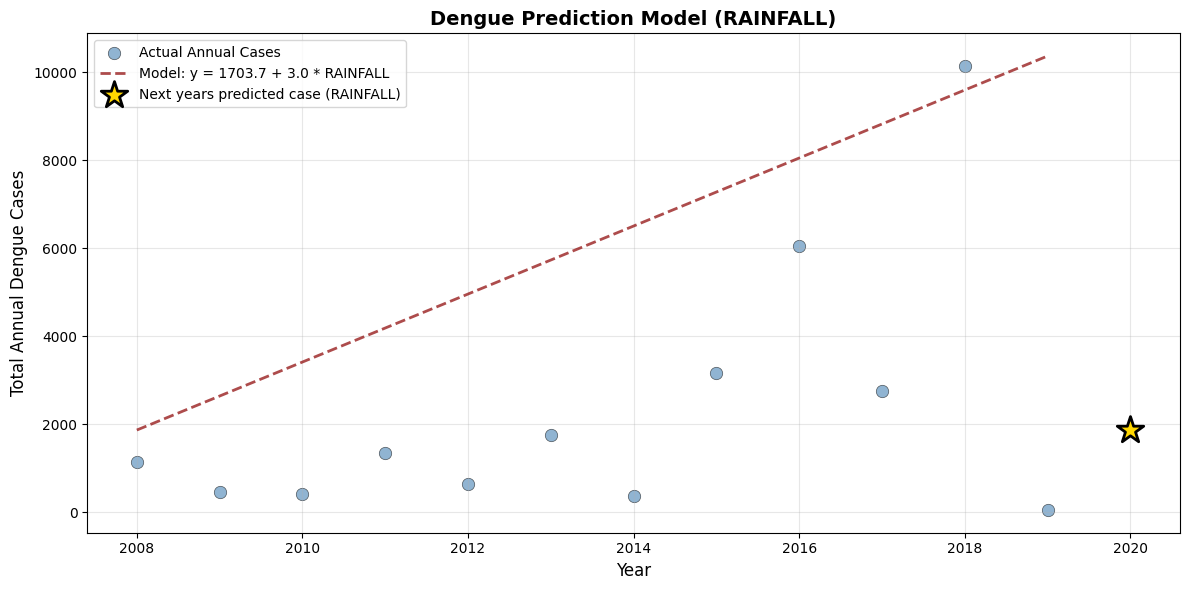

In [5]:
x4 = df_yearly[['RAINFALL']]
y = df_yearly['DENGUE']
X_train, X_test, y_train, y_test = train_test_split(x4, y, test_size=0.20, random_state=42)
years_test = df_yearly.loc[y_test.index, 'YEAR'].values
years_train = df_yearly.loc[y_train.index, 'YEAR'].values
X_train_np = X_train.values.flatten()
X_test_np = X_test.values.flatten()

#Ranges for theta0 and theta1
theta0_range = np.linspace(y.min(), y.max(), 50)
theta1_range = np.arange(1, 101)

#RMSE Calculations
best_rmse = float("inf")
best_theta0 = None
best_theta1 = None
best_r2 = None

rmse_list_rainfall = []
mse_list_rainfall = []
iter_list_rainfall = []
iter_count = 0
best_iter = None

for t0 in theta0_range:
    for t1 in theta1_range:
        y_pred = t0 + t1 * X_test_np
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        iter_count += 1
        rmse_list_rainfall.append(rmse)
        mse_list_rainfall.append(rmse**2)
        iter_list_rainfall.append(iter_count)

        if rmse < best_rmse:
            best_rmse = rmse
            best_theta0 = t0
            best_theta1 = t1
            best_r2 = r2_score(y_test, y_pred)
            best_iter = iter_count

#Calculating other metrices
X_train_pred = best_theta0 + best_theta1 * X_train_np
train_rmse = np.sqrt(mean_squared_error(y_train, X_train_pred))
train_r2 = r2_score(y_train, X_train_pred)
y_test_pred = best_theta0 + best_theta1 * X_test_np

#Creating the graph
plt.figure(figsize=(12,6))
plt.scatter(df_yearly['YEAR'], df_yearly['DENGUE'], alpha=0.6, s=80, label="Actual Annual Cases", color='steelblue', edgecolors='black', linewidth=0.5)

#Values for the graph axis
year_min = df_yearly['YEAR'].min()
year_max = df_yearly['YEAR'].max()
rainfall_temp_min = df_yearly['RAINFALL'].min()
rainfall_temp_max = df_yearly['RAINFALL'].max()

line_x = np.array([year_min, year_max])
line_y_rainfall = best_theta0 + best_theta1 * np.array([rainfall_temp_min, rainfall_temp_max])

test_mae = mean_absolute_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, X_train_pred)

#Predicting next years dengue cases
next_year = year_max + 1
recent_rainfall = df_yearly.loc[df_yearly['YEAR'] == year_max, 'RAINFALL'].values[0]
predicted_dengue_next_year_rainfall = best_theta0 + best_theta1 * recent_rainfall

#Compute MAE across the theta grid and plot
mae_list_rainfall = []
iter_rainfall_list = []
iter_count = 0

for t0 in theta0_range:
    for t1 in theta1_range:
        y_pred = t0 + t1 * X_test_np
        mae = mean_absolute_error(y_test, y_pred)
        iter_count += 1
        mae_list_rainfall.append(mae)
        iter_rainfall_list.append(iter_count)

print("Best Theta0 (RAINFALL):", best_theta0)
print("Best Theta1 (RAINFALL):", best_theta1)
print("Best Test RMSE (RAINFALL):", best_rmse)
print("Best Test R2 (RAINFALL):", best_r2)
print("Train RMSE (RAINFALL):", train_rmse)
print("Train R2 (RAINFALL):", train_r2)
print("Train MAE (RAINFALL):", train_mae)
print("Test MAE (RAINFALL):", test_mae)
print(f"Predicted Dengue Cases for next year (RAINFALL): {predicted_dengue_next_year_rainfall:.0f}")

plt.plot(line_x, line_y_rainfall, color='darkred', linewidth=2, linestyle='--', label=f"Model: y = {best_theta0:.1f} + {best_theta1:.1f} * RAINFALL", alpha=0.7)
plt.scatter(next_year, predicted_dengue_next_year_rainfall, s=400, marker='*', color='gold', edgecolors='black', linewidth=2, label='Next years predicted case (RAINFALL)', zorder=5)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Annual Dengue Cases", fontsize=12)
plt.title("Dengue Prediction Model (RAINFALL)", fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


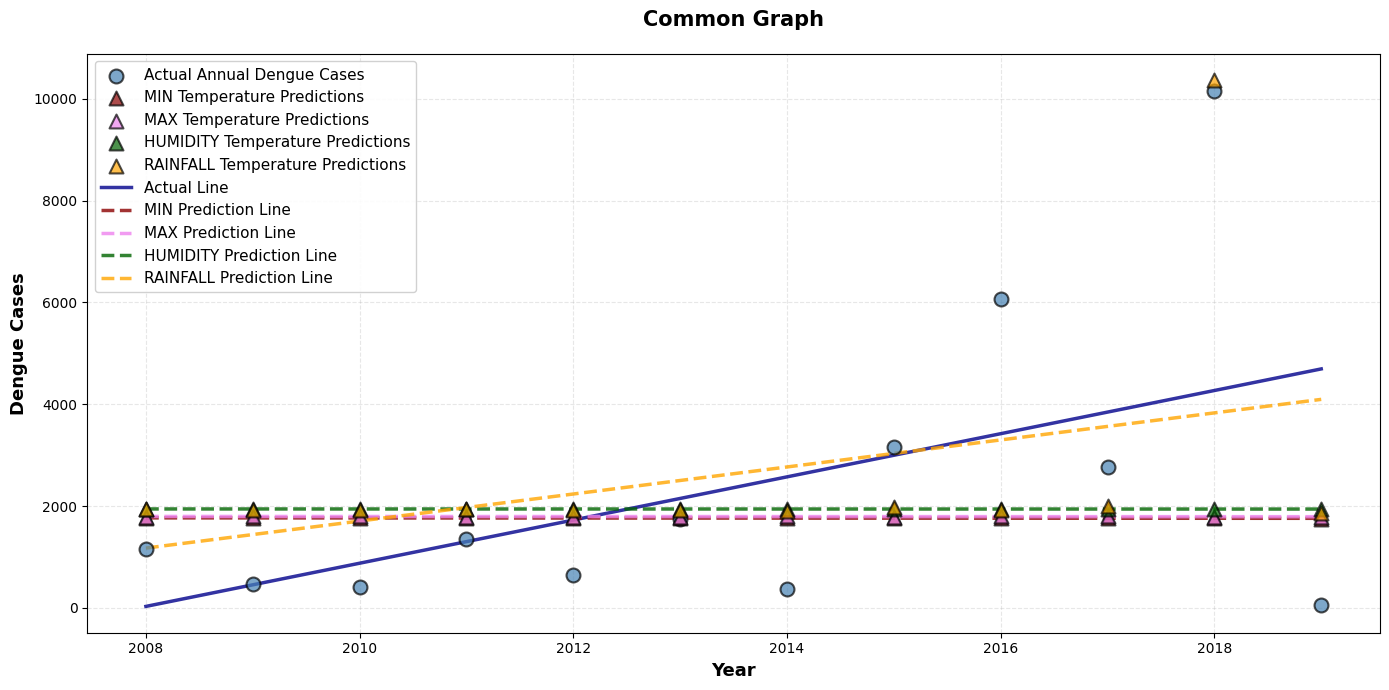

In [ ]:
plt.figure(figsize=(14, 7))

#Calculate predictions for all years using MIN
all_years = df_yearly['YEAR'].values
all_min_temps = df_yearly['MIN'].values
all_max_temps = df_yearly['MAX'].values
all_hum_temps = df_yearly['HUMIDITY'].values
all_rain_temps = df_yearly['RAINFALL'].values
all_min_predictions = best_theta0 + best_theta1 * all_min_temps
all_max_predictions = best_theta0 + best_theta1 * all_max_temps
all_hum_predictions = best_theta0 + best_theta1 * all_hum_temps
all_rain_predictions = best_theta0 + best_theta1 * all_rain_temps

#Plotting the scatter plots
plt.scatter(all_years, df_yearly['DENGUE'], alpha=0.7, s=100, label="Actual Annual Dengue Cases", color='steelblue', marker='o', edgecolors='black', linewidth=1.5, zorder=3)
plt.scatter(all_years, all_min_predictions, alpha=0.7, s=100, label="MIN Temperature Predictions",  color='darkred', marker='^', edgecolors='black', linewidth=1.5, zorder=3)
plt.scatter(all_years, all_max_predictions, alpha=0.7, s=100, label="MAX Temperature Predictions",  color='violet', marker='^', edgecolors='black', linewidth=1.5, zorder=3)
plt.scatter(all_years, all_hum_predictions, alpha=0.7, s=100, label="HUMIDITY Temperature Predictions",  color='darkgreen', marker='^', edgecolors='black', linewidth=1.5, zorder=3)
plt.scatter(all_years, all_rain_predictions, alpha=0.7, s=100, label="RAINFALL Temperature Predictions",  color='orange', marker='^', edgecolors='black', linewidth=1.5, zorder=3)

#Best fitting line for actual cases (linear regression)
lr_actual = LinearRegression()
lr_actual.fit(all_years.reshape(-1, 1), df_yearly['DENGUE'])
actual_line = lr_actual.predict(all_years.reshape(-1, 1))

#Best fitting line for MIN predictions
lr_predictions_min = LinearRegression()
lr_predictions_min.fit(all_years.reshape(-1, 1), all_min_predictions)
prediction_line_min = lr_predictions_min.predict(all_years.reshape(-1, 1))
prediction_line_min = lr_predictions_min.predict(all_years.reshape(-1, 1))

#Best fitting line for MAX predictions
lr_predictions_max = LinearRegression()
lr_predictions_max.fit(all_years.reshape(-1, 1), all_max_predictions)
prediction_line_max = lr_predictions_max.predict(all_years.reshape(-1, 1))
prediction_line_max = lr_predictions_max.predict(all_years.reshape(-1, 1))

#Best fitting line for HUMIDITY predictions
lr_predictions_hum = LinearRegression()
lr_predictions_hum.fit(all_years.reshape(-1, 1), all_hum_predictions)
prediction_line_hum = lr_predictions_hum.predict(all_years.reshape(-1, 1))
prediction_line_hum = lr_predictions_hum.predict(all_years.reshape(-1, 1))

#Best fitting line for RAINFALL predictions
lr_predictions_rain = LinearRegression()
lr_predictions_rain.fit(all_years.reshape(-1, 1), all_rain_predictions)
prediction_line_rain = lr_predictions_rain.predict(all_years.reshape(-1, 1))
prediction_line_rain = lr_predictions_rain.predict(all_years.reshape(-1, 1))

plt.plot(all_years, actual_line, color='darkblue', linewidth=2.5, linestyle='-', label="Actual Line", alpha=0.8, zorder=2)
plt.plot(all_years, prediction_line_min, color='darkred', linewidth=2.5, linestyle='--', label="MIN Prediction Line", alpha=0.8, zorder=2)
plt.plot(all_years, prediction_line_max, color='violet', linewidth=2.5, linestyle='--', label="MAX Prediction Line", alpha=0.8, zorder=2)
plt.plot(all_years, prediction_line_hum, color='darkgreen', linewidth=2.5, linestyle='--', label="HUMIDITY Prediction Line", alpha=0.8, zorder=2)
plt.plot(all_years, prediction_line_rain, color='orange', linewidth=2.5, linestyle='--', label="RAINFALL Prediction Line", alpha=0.8, zorder=2)

plt.xlabel("Year", fontsize=13, fontweight='bold')
plt.ylabel("Dengue Cases", fontsize=13, fontweight='bold')
plt.title("Common Graph", fontsize=15, fontweight='bold', pad=20)
plt.legend(loc='best', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

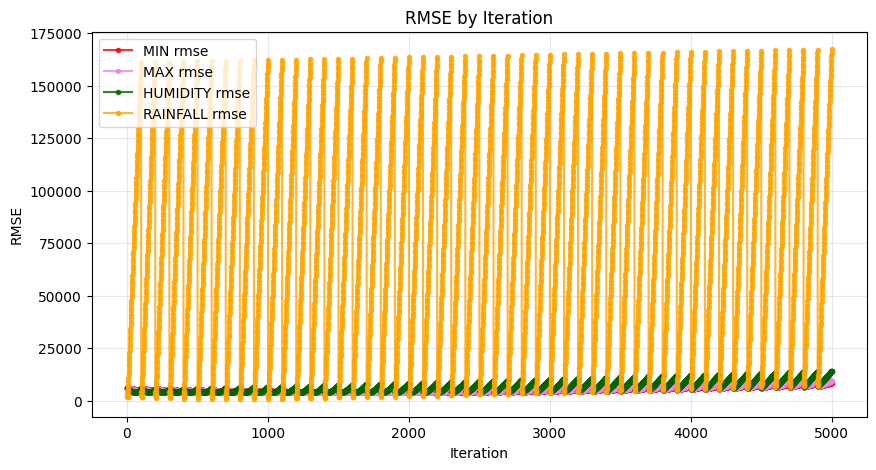

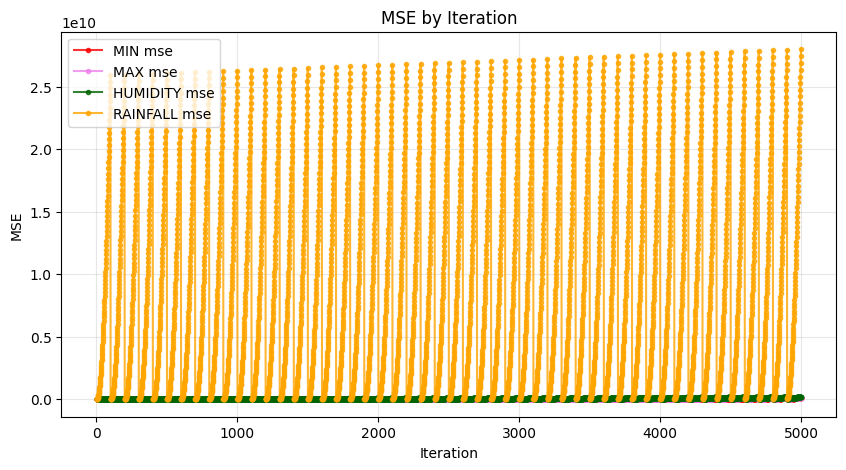

In [ ]:
#Plotting the RMSE curves
plt.figure(figsize=(10,5))
plt.plot(iter_list_min, rmse_list_min, marker='o', markersize=3, linestyle='-', color='red', alpha=0.8, label='MIN rmse')
plt.plot(iter_list_max, rmse_list_max, marker='o', markersize=3, linestyle='-', color='violet', alpha=0.8, label='MAX rmse')
plt.plot(iter_list_hum, rmse_list_hum, marker='o', markersize=3, linestyle='-', color='darkgreen', alpha=0.8, label='HUMIDITY rmse')
plt.plot(iter_list_rainfall, rmse_list_rainfall, marker='o', markersize=3, linestyle='-', color='orange', alpha=0.8, label='RAINFALL rmse')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE by Iteration')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Plotting the MSE curves
plt.figure(figsize=(10,5))
plt.plot(iter_list_min, mse_list_min, marker='o', markersize=3, linestyle='-', color='red', alpha=0.8, label='MIN mse')
plt.plot(iter_list_max, mse_list_max, marker='o', markersize=3, linestyle='-', color='violet', alpha=0.8, label='MAX mse')
plt.plot(iter_list_hum, mse_list_hum, marker='o', markersize=3, linestyle='-', color='darkgreen', alpha=0.8, label='HUMIDITY mse')
plt.plot(iter_list_rainfall, mse_list_rainfall, marker='o', markersize=3, linestyle='-', color='orange', alpha=0.8, label='RAINFALL mse')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE by Iteration')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

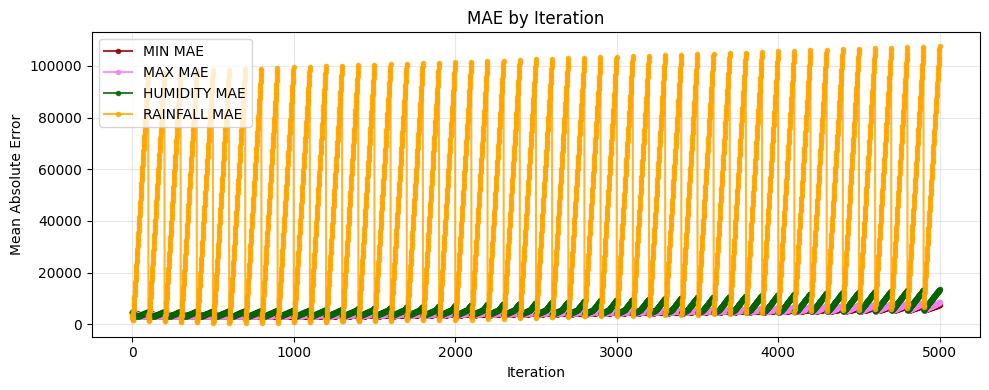

In [ ]:
#Plotting the MAE curves
plt.figure(figsize=(10,4))
plt.plot(iter_min_list, mae_list_min, marker='o', markersize=3, linestyle='-', color='darkred', alpha=0.8, label='MIN MAE')
plt.plot(iter_max_list, mae_list_max, marker='o', markersize=3, linestyle='-', color='violet', alpha=0.8, label='MAX MAE')
plt.plot(iter_hum_list, mae_list_hum, marker='o', markersize=3, linestyle='-', color='darkgreen', alpha=0.8, label='HUMIDITY MAE')
plt.plot(iter_rainfall_list, mae_list_rainfall, marker='o', markersize=3, linestyle='-', color='orange', alpha=0.8, label='RAINFALL MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error')
plt.title('MAE by Iteration')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()